In [66]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

## Считаем данные

In [10]:
df=pd.read_csv('datasets/heart.csv')
df.columns # столбцы датафрейма

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Проведем предобработку

Проверим есть ли в данных пропуски, т.е. значений NaN

In [12]:
df[df.columns].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Как видно, в данных нет пропусков, но если бы они были, то заменим их медианными значениями по полям

In [13]:
#df['new_column_name'] = df['column_name'].fillna(df['column_name'].median())

## Сбор статистики

Респонденты , старше 30 лет, с приступом стенокардии и  болезнью сердца

In [16]:
df[(df.age>30)&(df.cp==1)&(df.target>0)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


Респонденты страше 18 лет, у которых не было стенокардии

In [17]:
df[(df.age>18)&(df.oldpeak>0)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Анализ статистики

Интересный факт - у мужчин в возрасте от 30 до 70 лет сердечные болезни возникают на 14 %  чаще, чем у женщин. Средний возраст сердечного заболевания - 51 год

In [30]:
stat1=df[(df.age>30)&(df.age<70)&(df.target>0)]
print('Средний возраст ',stat1['age'].mean())
print('Пол ',stat1['sex'].mean())

Средний возраст  51.89873417721519
Пол  0.5759493670886076


Интересный факт - те, у кого один раз было стенокордияи и нет болезни сердца, вполне здоровые люди. В среднем почти у всех респондентов уровень заболевания Талассемия на уровне нормы (до 3 норма, от 3 до 6 так себе, от 6 до 7 плохо)

In [39]:
stat2=df[(df.target==0)&(df.oldpeak==1)]
print('Thal ',stat2['thal'].mean())

Thal  2.3


Интересный факт - ST-T wave abnormality имею чаще женщины, а вот left ventricular hyperthrophy есть чаще у мужчин

In [41]:
stat3=df[(df.target>0)&(df.slope==1)]
print('Пол ',stat3['sex'].mean())

Пол  0.46938775510204084


In [80]:
stat4=df[(df.target>0)&(df.slope==2)]
print('Пол ',stat4['sex'].mean())

Пол  0.5887850467289719


## Корреляции

Как ни странно, корреляция между полом и наличием заболевания сердца нет, хотя в среднем у мужчин сердечные болезни появляются чаще, чем у женщин

In [64]:
r, _ = stats.pearsonr(df['sex'],df['target'])
r

-0.28093657550176715

Интересный факт - между возрастом и получением хоть один раз синдрома стенокардии есть зависимость, но не ярко выраженная. Это значит, что с возрастом у человека могут появиться сердечные боли

In [59]:
r, _ = stats.pearsonr(df['age'],df['oldpeak'])
r

0.21001256735867363

## Визуализация

Гистограмма показывает, что болезни сердца у людей начинают появляться ближе к 45-50 годам

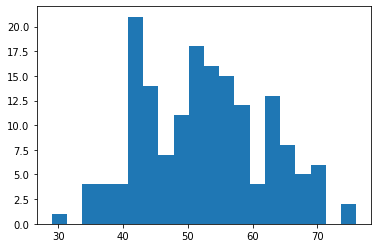

In [85]:
stat=df[(df.target>0)]
plt.hist(stat['age'],bins=20)
plt.show()

Гистограмма показывает, что люди , у которых хоть один раз был приступ стенокардии, в целом здоровые. У них уровень заболевания Талассемия на ровне нормы (до 3 норма, от 3 до 6 так себе, от 6 до 7 плохо). Это значит, что необязательно быть больным, чтобы была стенокардия

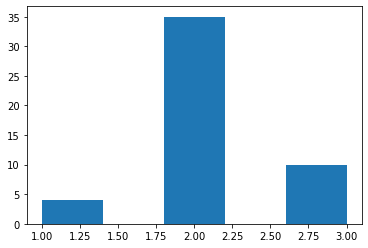

In [90]:
plt.hist(stat2['thal'],bins=5)
plt.show()

Гистограмма показывает, что у людей с нарушением сердечного ритма(или ST-T wave abnormality, left ventricular hyperthrophy)
распределение давления крови такое же, как и у здоровых людей, то есть в среднем 130-140 мм р.ст.

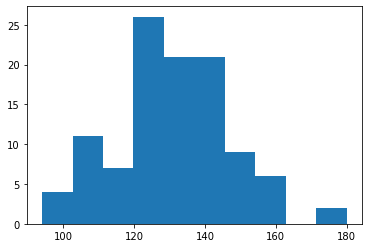

In [88]:
plt.hist(stat3['trestbps'],bins=10)
plt.show()